<a href="https://colab.research.google.com/github/alslmini/Machine-Learning-Programming/blob/main/20251028%EC%8B%A4%EC%8A%B5/Alcohol_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [26]:
# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine-Learning/20251028/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [27]:
# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [28]:
# 3. 시퀀스 생성
window = 12   # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)

## 데이터 분할

### Subtask:
데이터를 훈련 세트와 테스트 세트로 분할합니다.


In [29]:
#데이터 분할 (훈련 세트 80%, 테스트 세트 20%)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Lstm 모델 훈련

### Subtask:
훈련 데이터를 사용하여 LSTM 모델을 훈련합니다.


In [31]:
# 4. LSTM 모델
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0775
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0068
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0057
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0074
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0085
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0075
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0067
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0069
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0065
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0056
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0075
Epoch 13/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066
Epoch 14/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0065
Epoch 15/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076
Epoch 16/50


## Rnn 모델 훈련

### Subtask:
훈련 데이터를 사용하여 RNN 모델을 훈련합니다.


In [32]:
# 훈련 데이터를 사용하여 RNN 모델 훈련
rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window, 1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0475
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0010
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010    
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6565e-04
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010
Epoch 16/50

## 예측 및 평가

### Subtask:
훈련된 RNN 및 LSTM 모델로 테스트 데이터를 예측하고 MSE를 계산합니다.

In [33]:
from sklearn.metrics import mean_squared_error

# RNN 모델 예측 및 MSE 계산
rnn_pred = rnn_model.predict(X_test)
rnn_mse = mean_squared_error(y_test, rnn_pred)
print(f'RNN 모델 MSE: {rnn_mse}')

# LSTM 모델 예측 및 MSE 계산
lstm_pred = model.predict(X_test)
lstm_mse = mean_squared_error(y_test, lstm_pred)
print(f'LSTM 모델 MSE: {lstm_mse}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step
RNN 모델 MSE: 0.0037086957943785795
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
LSTM 모델 MSE: 0.008956332587684907


## 시각화

### Subtask:
RNN 및 LSTM 모델의 예측 결과를 실제 값과 함께 시각화합니다.

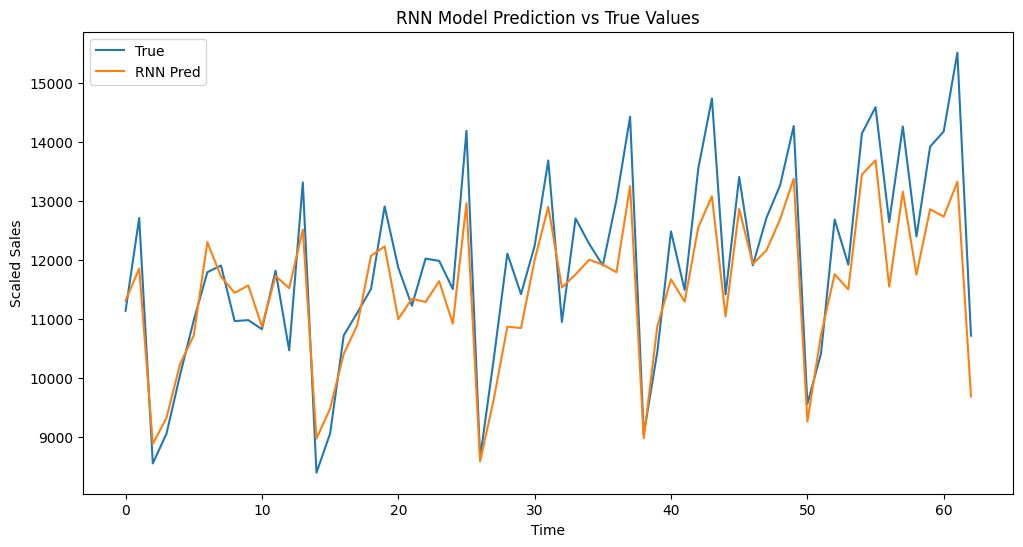

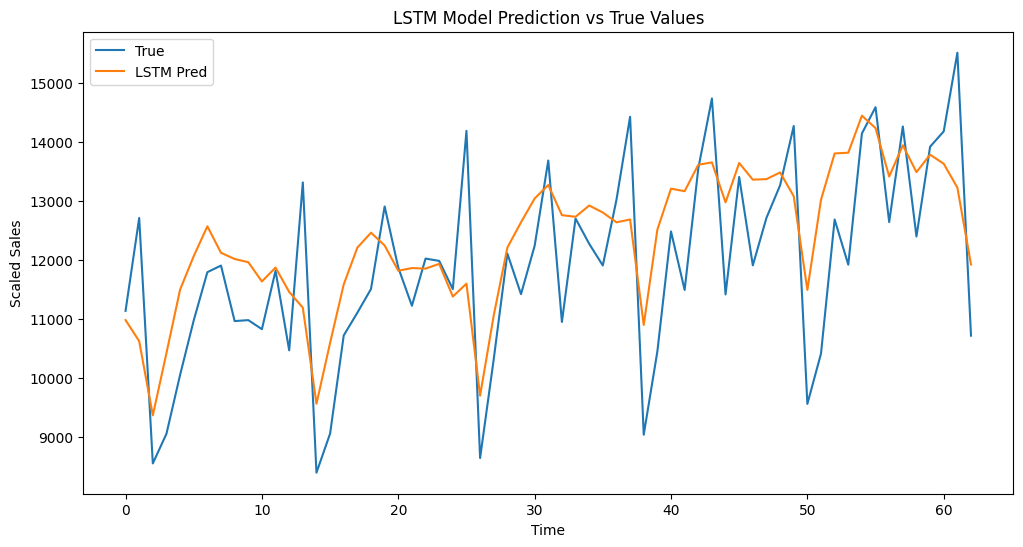

In [34]:
# RNN 모델 예측 시각화
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_test), label='True')
plt.plot(scaler.inverse_transform(rnn_pred), label='RNN Pred')
plt.title('RNN Model Prediction vs True Values')
plt.xlabel('Time')
plt.ylabel('Scaled Sales')
plt.legend()
plt.show()

# LSTM 모델 예측 시각화
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_test), label='True')
plt.plot(scaler.inverse_transform(lstm_pred), label='LSTM Pred')
plt.title('LSTM Model Prediction vs True Values')
plt.xlabel('Time')
plt.ylabel('Scaled Sales')
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


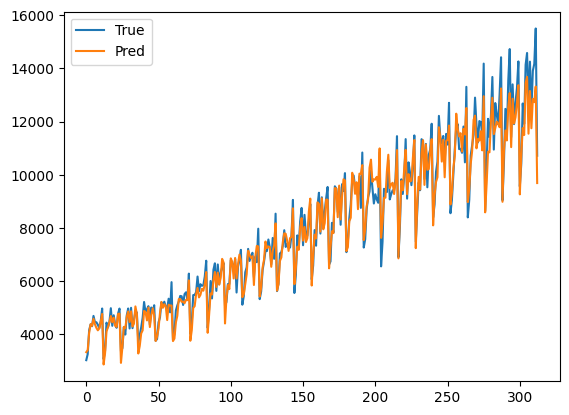

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


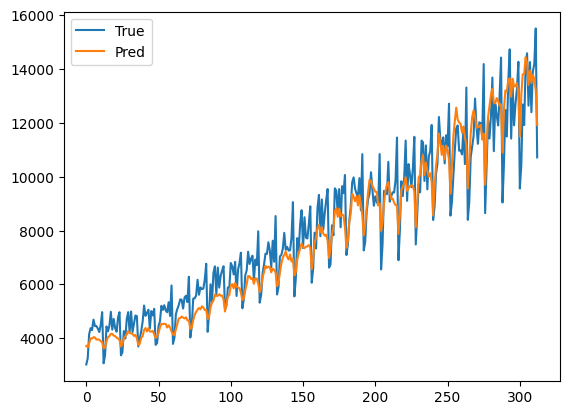

In [35]:
#예측값

pred_rnn = rnn_model.predict(X)
plt.plot(scaler.inverse_transform(y), label='True')
plt.plot(scaler.inverse_transform(pred_rnn), label='Pred')
plt.legend(); plt.show()

pred_lstm = model.predict(X)
plt.plot(scaler.inverse_transform(y), label='True')
plt.plot(scaler.inverse_transform(pred_lstm), label='Pred')
plt.legend(); plt.show()